<a href="https://colab.research.google.com/github/SiddhantV369/predictive-modelling/blob/main/experiment-11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [230]:

class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):

        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)




# Task 1

Calculating WCSS for k= 1
  WCSS for Cluster 0: 9532.93
  Total WCSS for K=1: 9532.93
Calculating WCSS for k= 2
  WCSS for Cluster 0: 200.63
  WCSS for Cluster 1: 1840.13
  Total WCSS for K=2: 2040.75
Calculating WCSS for k= 3
  WCSS for Cluster 0: 48.46
  WCSS for Cluster 1: 1840.13
  WCSS for Cluster 2: 91.17
  Total WCSS for K=3: 1979.76
Calculating WCSS for k= 4
  WCSS for Cluster 0: 72.96
  WCSS for Cluster 1: 224.64
  WCSS for Cluster 2: 204.36
  WCSS for Cluster 3: 73.99
  Total WCSS for K=4: 575.95
Calculating WCSS for k= 5
  WCSS for Cluster 0: 73.99
  WCSS for Cluster 1: 72.96
  WCSS for Cluster 2: 224.64
  WCSS for Cluster 3: 76.50
  WCSS for Cluster 4: 63.72
  Total WCSS for K=5: 511.82
Calculating WCSS for k= 6
  WCSS for Cluster 0: 39.73
  WCSS for Cluster 1: 200.63
  WCSS for Cluster 2: 27.80
  WCSS for Cluster 3: 59.77
  WCSS for Cluster 4: 76.50
  WCSS for Cluster 5: 63.72
  Total WCSS for K=6: 468.15
Calculating WCSS for k= 7
  WCSS for Cluster 0: 13.80
  WCSS for Clu

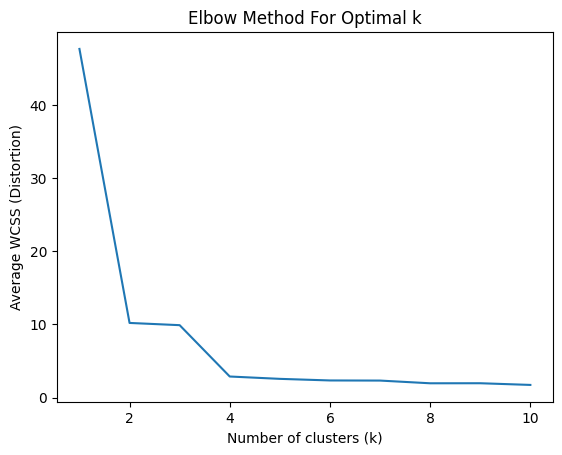

Overall Average WCSS (Distortion) values per K:
{1: np.float64(47.66466236564508), 2: np.float64(10.203774640149009), 3: np.float64(9.898776954352176), 4: np.float64(2.879754180604729), 5: np.float64(2.5590780087371523), 6: np.float64(2.3407255996218623), 7: np.float64(2.324018680204588), 8: np.float64(1.9539105092593432), 9: np.float64(1.9600266766505272), 10: np.float64(1.729887857892699)}


In [231]:
from scipy.spatial.distance import cdist



def WCSS(K_max):
  distortion=[]
  points={}

  for k in range(1,K_max+1):
    model=KMeans(n_clusters=k)
    res=model.fit_predict(X)
    centroids = model.centroids

    current_k_total_wcss = calculate_and_print_wcss_per_cluster(X, res, centroids, k)

    distortion.append(current_k_total_wcss / X.shape[0])
    points[k]=distortion[-1]




  def wcss_per_cluster(X, cluster_labels, centroids, k):

    total_wcss = 0
    per_cluster = {}

    print("Calculating WCSS for k=",k)
    for cluster_id in range(k):
        points_cluster = X[cluster_labels == cluster_id]
        centroid_cluster = centroids[cluster_id]

        if len(points_in_this_cluster) > 0:
            wcss_cluster = np.sum(np.sum((points_cluster - centroid_cluster)**2, axis=1))
        else:
            wcss_cluster = 0

        wcss_per_cluster[f"Cluster {cluster_id}"] = wcss_cluster
        current_k_total_wcss += wcss_this_cluster
        print(f"  WCSS for Cluster {cluster_id}: {wcss_cluster:.2f}")



    return current_k_total_wcss



  plt.plot(points.keys(),points.values())
  plt.title('Elbow Method For Optimal k')
  plt.xlabel('Number of clusters (k)')
  plt.ylabel('Average WCSS (Distortion)')
  plt.show()
  print("Overall Average WCSS (Distortion) values per K:")
  print(points)

WCSS(10)

# Task 2


Calculating WCSS for k= 1
  WCSS for Cluster 0: 15799.20
  Total WCSS for K=1: 15799.20
Calculating WCSS for k= 2
  WCSS for Cluster 0: 202.02
  WCSS for Cluster 1: 3069.19
  Total WCSS for K=2: 3271.21
Calculating WCSS for k= 3
  WCSS for Cluster 0: 174.54
  WCSS for Cluster 1: 211.54
  WCSS for Cluster 2: 202.02
  Total WCSS for K=3: 588.10
Calculating WCSS for k= 4
  WCSS for Cluster 0: 59.69
  WCSS for Cluster 1: 66.33
  WCSS for Cluster 2: 211.54
  WCSS for Cluster 3: 202.02
  Total WCSS for K=4: 539.58
Calculating WCSS for k= 5
  WCSS for Cluster 0: 35.86
  WCSS for Cluster 1: 202.02
  WCSS for Cluster 2: 36.97
  WCSS for Cluster 3: 21.59
  WCSS for Cluster 4: 211.54
  Total WCSS for K=5: 507.98
Calculating WCSS for k= 6
  WCSS for Cluster 0: 39.25
  WCSS for Cluster 1: 27.34
  WCSS for Cluster 2: 174.54
  WCSS for Cluster 3: 62.09
  WCSS for Cluster 4: 53.78
  WCSS for Cluster 5: 81.59
  Total WCSS for K=6: 438.60
Calculating WCSS for k= 7
  WCSS for Cluster 0: 174.54
  WCSS for

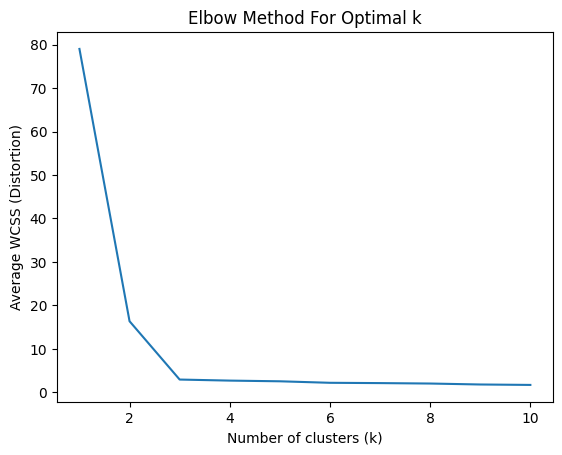

Overall Average WCSS (Distortion) values per K:
{1: np.float64(78.99602465637882), 2: np.float64(16.35603709639888), 3: np.float64(2.9405040069578603), 4: np.float64(2.6978989649015097), 5: np.float64(2.5398935850726874), 6: np.float64(2.192985065534154), 7: np.float64(2.1243314246153795), 8: np.float64(2.0244798068771876), 9: np.float64(1.8041154336511454), 10: np.float64(1.7049923802582392)}


In [232]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

X, y = make_blobs(n_samples=200, n_features=3)
WCSS(10)

model=KMeans(n_clusters=3)
res=model.fit_predict(X)


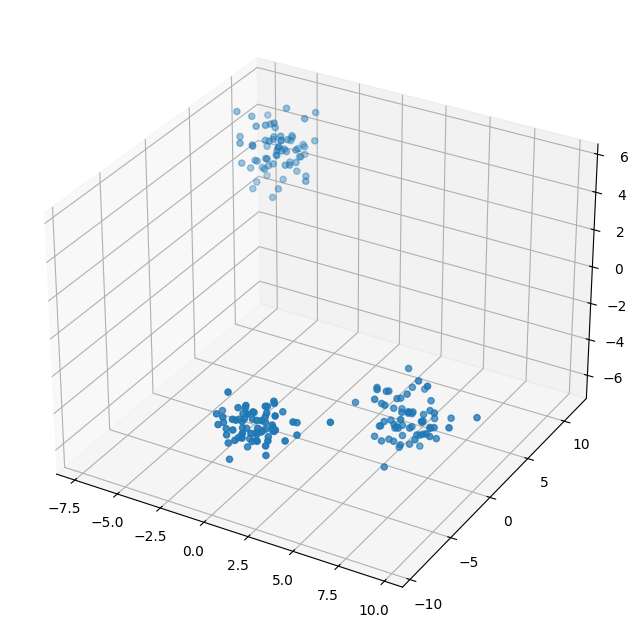

In [233]:


fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
#plotting data points and cli

ax.scatter3D(X[:,0],X[:,1],X[:,2])

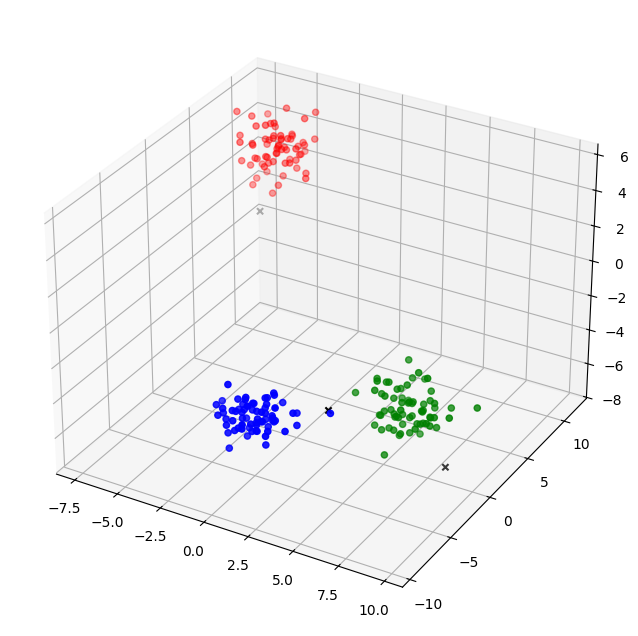

In [234]:
centroids = model.centroids
cmap={0:'red',1:'green',2:'blue'}
assigned_colors = [cmap.get(label, 'black') for label in res]
fig=plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
#plotting data points and cli

ax.scatter3D(X[:,0],X[:,1],X[:,2],c=assigned_colors)
ax.scatter3D(centroids[:][0],centroids[:][1],centroids[:][2],marker='x',c='black')